Dataset loaded successfully!
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


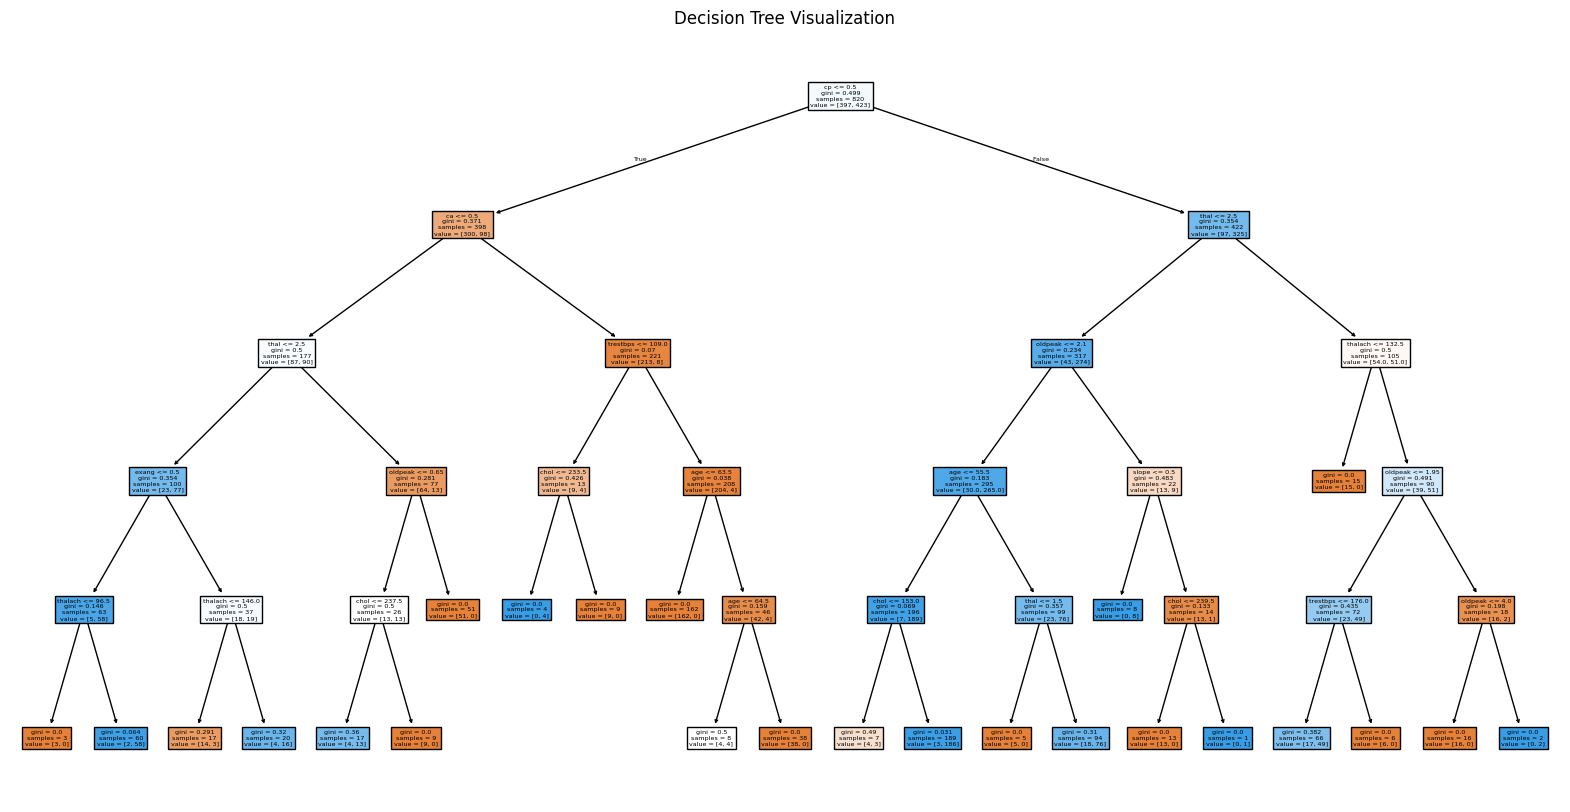

Decision Tree Accuracy: 0.8439024390243902
Random Forest Accuracy: 0.9853658536585366


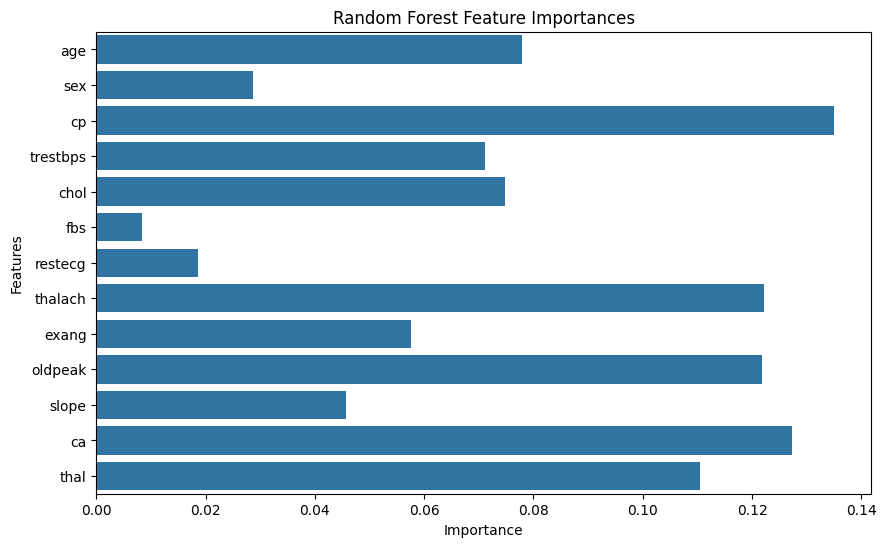

Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Average CV score: 0.9970731707317073


In [5]:
# 1. Load Dataset
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Music\ai-ml_internship\task-5\heart.csv")  # Make sure the file is in the same directory or provide correct path
print("Dataset loaded successfully!")

# 2. Preprocess Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill or drop missing values if any (assuming mean strategy here)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Encode categorical columns if any
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Split into features and target
X = df.drop("target", axis=1)  # Replace 'target' with the actual target column name
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# 4. Visualize Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

# 5. Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Evaluate Both Models
from sklearn.metrics import accuracy_score

y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# 7. Feature Importance
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=rf.feature_importances_, y=X.columns)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# 8. Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())
